In [132]:
%autosave 120

Autosaving every 120 seconds


Imports

In [133]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from env import get_connection

Read in the data from codeup's SQL server.

In [134]:
query = '''
        SELECT *
        FROM student_grades
        '''

In [135]:
url = get_connection('school_sample')

In [136]:
df = pd.read_sql(query, url)

Summarize our data with some pandas methods.

In [137]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [138]:
df.shape

(104, 5)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [140]:
df.isna().sum()

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64

In [141]:
df[df.exam1.isna()]

,student_id,exam1,exam2,exam3,final_grade
103,10,NaN,70,79,70


Is there anything we need to clean up?
- The null value in exam1
- Convert exam3 from object to integer

In [142]:
df = df.dropna()

In [143]:
df.isna().sum()

student_id     0
exam1          0
exam2          0
exam3          0
final_grade    0
dtype: int64

In [144]:
df = df[df['exam3'] != ' ']

In [145]:
df.exam3 = df.exam3.astype('int')
df.dtypes

student_id       int64
exam1          float64
exam2            int64
exam3            int64
final_grade      int64
dtype: object

Let's look at the distribution of each feature of our dataset!

In [146]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


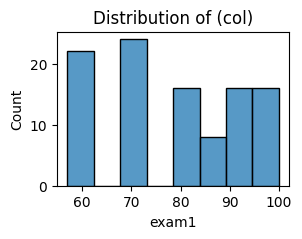

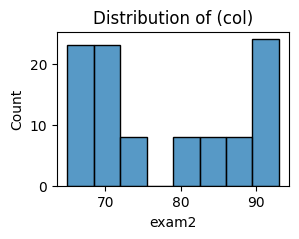

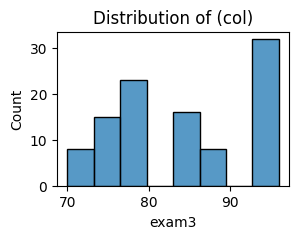

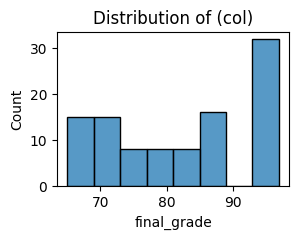

In [147]:
for col in df.drop(columns = ['student_id']).columns:
    plt.figure(figsize = (3, 2))
    sns.histplot(data = df, x = col)
    plt.title(f'Distribution of (col)')
    plt.show()

We could build some sort of pipeline out of this...

In [165]:
def get_grades():
    
    filename = 'grades.csv'
    
    if os.path.isfile(filename):
        
        return pd.read_csv(filename)
        
    else:
        query = '''
                SELECT *
                FROM student_grades
                '''
        
        url = get_connection('school_sample')
        
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index = False)

        return df

In [166]:
def clean_grades():

    df = get_grades()

    df = df.dropna()

    df = df[df.exam3 != ' ']

    df.exam3 = df.exam3.astype('int')

    return df

In [167]:
df = clean_grades()

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 0 to 102
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   102 non-null    int64  
 1   exam1        102 non-null    float64
 2   exam2        102 non-null    int64  
 3   exam3        102 non-null    int64  
 4   final_grade  102 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 4.8 KB
